In [41]:
from matplotlib import rcParams
rcParams['font.family'] = 'serif'
import matplotlib.pyplot as plt
import matplotlib
import numpy as np

In [42]:
# Load the ranges
ranges = np.genfromtxt("../bin/Basic.csv",dtype=(int,float,float),delimiter=",")
n_range = ranges[0]
T_range = ranges[1]
vx_range = ranges[2]
vy_range = ranges[3]
vz_range = ranges[4]
Bx_range = ranges[5]
By_range = ranges[6]
Bz_range = ranges[7]

# Extract sizes
nn = n_range[0]
nT = T_range[0]
nvx = vx_range[0]
nvy = vy_range[0]
nvz = vz_range[0]
nBx = Bx_range[0]
nBy = By_range[0]
nBz = Bz_range[0]

# Load the data
size = nn*nT*nvx*nvy*nvz*nBx*nBy*nBz
arr_shape = (nBz, nBy, nBx, nvz, nvy, nvx, nT, nn)
iterations = np.fromfile("../bin/Basic.bmrk",dtype=np.float64,count=size)
n_err = np.fromfile("../bin/Basic.bmrk",dtype=np.float64,count=size,offset=size*8)
T_err = np.fromfile("../bin/Basic.bmrk",dtype=np.float64,count=size,offset=2*size*8)
vx_err = np.fromfile("../bin/Basic.bmrk",dtype=np.float64,count=size,offset=3*size*8)
vy_err = np.fromfile("../bin/Basic.bmrk",dtype=np.float64,count=size,offset=4*size*8)
vz_err = np.fromfile("../bin/Basic.bmrk",dtype=np.float64,count=size,offset=5*size*8)

# Get the auxiliary data, too
mag = np.fromfile("../bin/Basic.aux",dtype=np.float64,count=size)
therm = np.fromfile("../bin/Basic.aux",dtype=np.float64,count=size,offset=size*8)

def index(ni, ti, vxi, vyi, vzi, bxi, byi, bzi):
    return ni + nn*(ti + nT*(vxi + nvx*(vyi + nvy*(vzi + nvz*(bxi + nBx*(byi + nBy*bzi))))))

In [43]:
# Average out errors over magnetic fields and velocities
iterations_avg = np.mean(iterations.reshape(arr_shape),(0,1,2,3,4,5))
n_err_avg = np.mean(n_err.reshape(arr_shape),(0,1,2,3,4,5))
T_err_avg = np.mean(T_err.reshape(arr_shape),(0,1,2,3,4,5))
vx_err_avg = np.mean(vx_err.reshape(arr_shape),(0,1,2,3,4,5))
vy_err_avg = np.mean(vy_err.reshape(arr_shape),(0,1,2,3,4,5))
vz_err_avg = np.mean(vz_err.reshape(arr_shape),(0,1,2,3,4,5))

# Find errors based on magnetization and density to pressure ratio.
density = np.linspace(n_range[1], n_range[2], nn)
temperature = np.linspace(T_range[1], T_range[2], nT)

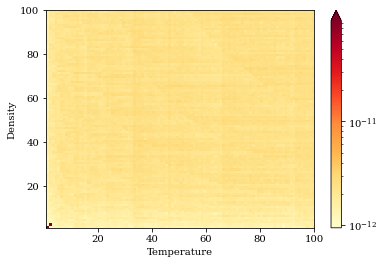

In [44]:
# Make a heatmap
y, x = np.meshgrid(np.linspace(n_range[1],n_range[2],nn), np.linspace(T_range[1],T_range[2],nT))


z = n_err_avg
z = z[:-1,:-1]
#w = iterations_avg
w = iterations_avg[:-1,:-1]
z_min, z_max = np.abs(z).min(), np.abs(z).max()
w_min, w_max = np.abs(w).min(), np.abs(w).max()

fig, ax = plt.subplots()

c = ax.pcolormesh(x, y, z, cmap='YlOrRd', norm=matplotlib.colors.LogNorm(vmin=z_min, vmax=z_min*50))
#c = ax.pcolormesh(x, y, w, cmap='winter', vmin=w_min, vmax=w_max)
#ax.contour(x, y, w, levels=5, colors='black', linestyles=('solid', 'dashed', 'dashdot', 'dotted'))
#ax.set_title('Density, Average Relative Error')
#ax.set_title("Average Iterations")
ax.set_xlabel('Temperature')
ax.set_ylabel('Density')
# set the limits of the plot to the limits of the data
ax.axis([x.min(), x.max(), y.min(), y.max()])
fig.colorbar(c, ax=ax, extend='max')

'''
z = iterations
z_min, z_max = np.abs(z).min(), np.abs(z).max()

fig, ax = plt.subplots()
c = ax.pcolor(therm,mag,z, cmap='seismic', vmin=z_min, vmax=z_max)
ax.set_title('Average Iterations')
ax.set_xlabel('Temperature')
ax.set_ylabel('Magnetization')
# set the limits of the plot to the limits of the data
ax.axis([therm.min(), therm.max(), mag.min(), mag.max()])
fig.colorbar(c, ax=ax)
'''

plt.show()